# Buidling and visualizing word frequences per sentiment class
Utility function to calculate the word frequencies per sentiment class for tweets.
Visualizing the frequencies.

In [5]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
from utils import process_tweet
import numpy as np

In [14]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label for each tweet
    Output:
        freqs: a dictionary mapping each (word, sentiment label) to its frequency
    
    """
    labels = np.squeeze(ys).tolist()
    freqs = {}
    
    for tweet, y in zip(tweets, labels):
        tokens = process_tweet(tweet)
        for word in tokens:
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1
    return freqs

In [12]:
# load sample dataset
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
tweets = positive_tweets + negative_tweets
ys = np.append(np.ones(len(positive_tweets)), np.zeros(len(negative_tweets)))

In [15]:
freqs = build_freqs(tweets, ys)

In [24]:
first_ten = list(freqs.items())[:10]
print(first_ten)

[(('followfriday', 1.0), 25), (('top', 1.0), 32), (('engag', 1.0), 7), (('member', 1.0), 16), (('commun', 1.0), 33), (('week', 1.0), 83), ((':)', 1.0), 3568), (('hey', 1.0), 76), (('jame', 1.0), 7), (('odd', 1.0), 2)]


In [34]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

data = []
for key in keys:
    data.append([key, freqs.get((key, 1), 0), freqs.get((key, 0), 0)])

data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


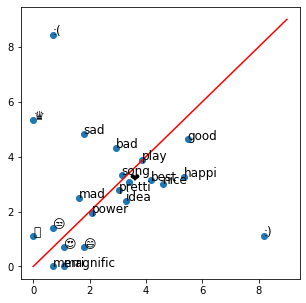

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))

x = np.log([p[1]+1 for p in data])
y = np.log([p[2]+1 for p in data])

ax.scatter(x, y)

for i, d  in enumerate(data):
    ax.annotate(d[0], (x[i], y[i]), fontsize=12)
    
ax.plot([0, 9], [0, 9], color="red")
plt.show()